In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quals = pd.read_csv(r"C:\Users\mrkka\Desktop\Data\Earnings and qualifications\raw_quals.csv")
earns = pd.read_csv(r"C:\Users\mrkka\Desktop\Data\Earnings and qualifications\raw_earnings.csv")

In [3]:
quals.columns = [x.lower() for x in quals.columns]
quals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377520 entries, 0 to 377519
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 377520 non-null  object 
 1   date_name            377520 non-null  object 
 2   date_code            377520 non-null  object 
 3   date_type            377520 non-null  object 
 4   date_typecode        377520 non-null  int64  
 5   date_sortorder       377520 non-null  int64  
 6   geography            377520 non-null  int64  
 7   geography_name       377520 non-null  object 
 8   geography_code       377520 non-null  object 
 9   geography_type       377520 non-null  object 
 10  geography_typecode   377520 non-null  int64  
 11  geography_sortorder  377520 non-null  int64  
 12  variable             377520 non-null  int64  
 13  variable_name        377520 non-null  object 
 14  variable_code        377520 non-null  int64  
 15  variable_type    

In [4]:
quals = quals.dropna(subset='obs_value')
quals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189819 entries, 24 to 377491
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 189819 non-null  object 
 1   date_name            189819 non-null  object 
 2   date_code            189819 non-null  object 
 3   date_type            189819 non-null  object 
 4   date_typecode        189819 non-null  int64  
 5   date_sortorder       189819 non-null  int64  
 6   geography            189819 non-null  int64  
 7   geography_name       189819 non-null  object 
 8   geography_code       189819 non-null  object 
 9   geography_type       189819 non-null  object 
 10  geography_typecode   189819 non-null  int64  
 11  geography_sortorder  189819 non-null  int64  
 12  variable             189819 non-null  int64  
 13  variable_name        189819 non-null  object 
 14  variable_code        189819 non-null  int64  
 15  variable_type   

In [5]:
quals['year'] = quals['date'].str[:4]
quals.year.value_counts()

2005    10113
2004    10028
2006     9980
2007     9963
2008     9937
2009     9907
2010     9855
2011     9787
2012     9744
2013     9724
2014     9690
2015     9646
2016     9577
2017     9557
2018     9498
2019     9456
2020     9282
2021     9278
2022     7599
2023     7198
Name: year, dtype: int64

In [6]:
quals.variable_name.unique()

array(['% with NVQ4+ - aged 16-64', '% with NVQ3 only - aged 16-64',
       '% with Trade Apprenticeships - aged 16-64',
       '% with NVQ2 only - aged 16-64', '% with NVQ1 only - aged 16-64',
       '% with other qualifications (NVQ) - aged 16-64',
       '% with no qualifications (NVQ) - aged 16-64',
       '% with RQF4+ - aged 16-64', '% with RQF3 only - aged 16-64',
       '% with RQF2 only - aged 16-64', '% with RQF1 only - aged 16-64',
       '% with other qualifications (RQF) - aged 16-64',
       '% with no qualifications (RQF) - aged 16-64'], dtype=object)

In [7]:
conditions = [
    quals['variable_name'].str.find("4+") != -1,
    quals['variable_name'].str.find("3 only") != -1,
    quals['variable_name'].str.find("2 only") != -1,
    quals['variable_name'].str.find("1 only") != -1,
    quals['variable_name'].str.find("Trade") != -1,
    quals['variable_name'].str.find("with other") != -1,
    quals['variable_name'].str.find("with no") != -1,
]

values = ['L4+', 'L3', 'L2', 'L1', 'Apprenticeship', 'Other quals', 'No quals']

quals['level'] = np.select(conditions, values)


In [8]:
quals.measures_name.unique()    

array(['Variable', 'Numerator', 'Denominator', 'Confidence'], dtype=object)

In [9]:
q_sub = quals[(quals['level'] == 'L4+') & (quals['measures_name'] == 'Variable') & (quals['year'] == '2021')]
q_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 320916 to 339740
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 362 non-null    object 
 1   date_name            362 non-null    object 
 2   date_code            362 non-null    object 
 3   date_type            362 non-null    object 
 4   date_typecode        362 non-null    int64  
 5   date_sortorder       362 non-null    int64  
 6   geography            362 non-null    int64  
 7   geography_name       362 non-null    object 
 8   geography_code       362 non-null    object 
 9   geography_type       362 non-null    object 
 10  geography_typecode   362 non-null    int64  
 11  geography_sortorder  362 non-null    int64  
 12  variable             362 non-null    int64  
 13  variable_name        362 non-null    object 
 14  variable_code        362 non-null    int64  
 15  variable_type        362 non-nul

In [10]:
x_sub = q_sub[['geography_name', 'obs_value']].reset_index(drop=True)
x_sub = x_sub.rename(columns={'obs_value': 'NVQ4+'})

<Axes: xlabel='NVQ4+', ylabel='Density'>

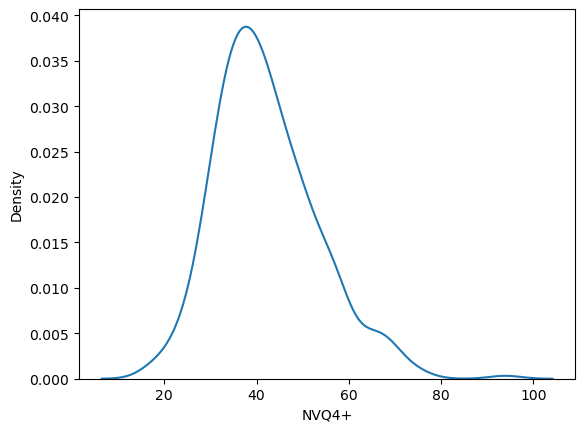

In [11]:
sns.kdeplot(x_sub['NVQ4+'])

In [13]:
min_value = x_sub['NVQ4+'].min()
max_value = x_sub['NVQ4+'].max()

In [14]:
rows_with_min = x_sub[x_sub['NVQ4+'] == min_value]
rows_with_max = x_sub[x_sub['NVQ4+'] == max_value]

In [15]:
rows_with_min

,geography_name,NVQ4+
102,Mansfield,16.7


In [16]:
rows_with_max

,geography_name,NVQ4+
183,City of London,93.9


# Earnings

In [17]:
earns.columns = [x.lower() for x in earns.columns]

In [18]:
earns = earns.dropna(subset='obs_value')

In [19]:
earns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101442 entries, 42000 to 153999
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 101442 non-null  int64  
 1   date_name            101442 non-null  int64  
 2   date_code            101442 non-null  int64  
 3   date_type            101442 non-null  object 
 4   date_typecode        101442 non-null  int64  
 5   date_sortorder       101442 non-null  int64  
 6   geography            101442 non-null  int64  
 7   geography_name       101442 non-null  object 
 8   geography_code       101442 non-null  object 
 9   geography_type       101442 non-null  object 
 10  geography_typecode   101442 non-null  int64  
 11  geography_sortorder  101442 non-null  int64  
 12  sex                  101442 non-null  int64  
 13  sex_name             101442 non-null  object 
 14  sex_code             101442 non-null  int64  
 15  sex_type     

In [20]:
earns.sex_name.unique()

array(['Male', 'Female', 'Total', 'Full Time Workers',
       'Part Time Workers'], dtype=object)

In [21]:
earns.pay_name.unique()

array(['Weekly pay - gross', 'Annual pay - gross'], dtype=object)

In [22]:
earns.measures_name.unique()

array(['Value', 'Confidence'], dtype=object)

In [23]:
e_sub = earns[(earns['sex_name'] == 'Total') & 
              (earns['pay_name'] == 'Annual pay - gross') & 
              (earns['measures_name'] == 'Value') & 
              (earns['date'] == 2021)
]

In [24]:
e_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 133010 to 139990
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 334 non-null    int64  
 1   date_name            334 non-null    int64  
 2   date_code            334 non-null    int64  
 3   date_type            334 non-null    object 
 4   date_typecode        334 non-null    int64  
 5   date_sortorder       334 non-null    int64  
 6   geography            334 non-null    int64  
 7   geography_name       334 non-null    object 
 8   geography_code       334 non-null    object 
 9   geography_type       334 non-null    object 
 10  geography_typecode   334 non-null    int64  
 11  geography_sortorder  334 non-null    int64  
 12  sex                  334 non-null    int64  
 13  sex_name             334 non-null    object 
 14  sex_code             334 non-null    int64  
 15  sex_type             334 non-nul

In [25]:
y_sub = e_sub[['geography_name', 'obs_value']]

In [26]:
y_sub = y_sub.rename(columns={'obs_value': 'Annual median income'})

<Axes: xlabel='Annual median income', ylabel='Density'>

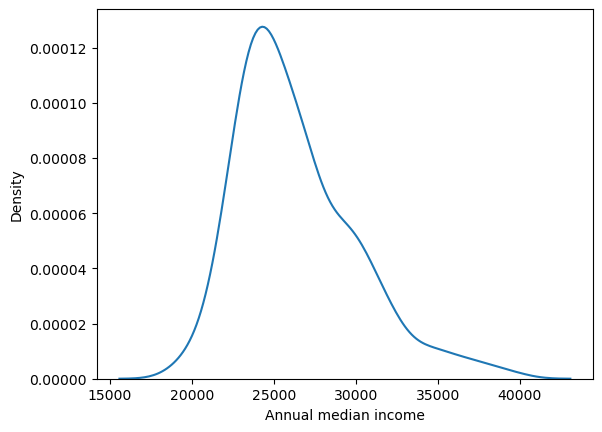

In [27]:
sns.kdeplot(y_sub['Annual median income'])

In [28]:
df = y_sub.merge(x_sub, on='geography_name', how='left')

In [29]:
df.isna().sum()

geography_name          0
Annual median income    0
NVQ4+                   3
dtype: int64

In [30]:
df = df.dropna()

<Axes: xlabel='NVQ4+', ylabel='Annual median income'>

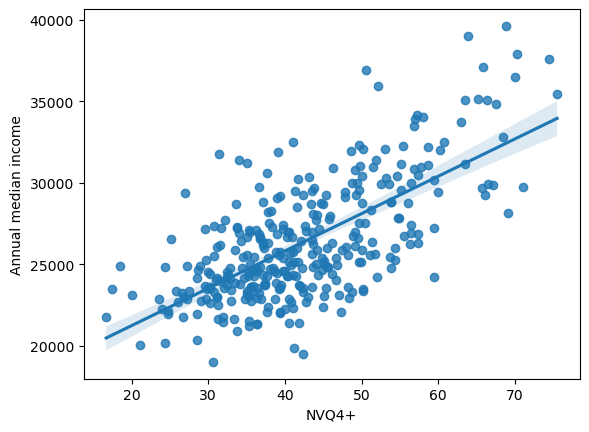

In [33]:
sns.regplot(df, y='Annual median income', x='NVQ4+')

In [32]:
import statsmodels.api as sm

# Assuming df is your DataFrame, and 'x' and 'y' are your variables
Y = df[['Annual median income']]  # Scikit-learn expects X to be a 2D array
X = df['NVQ4+']

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the regression line
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Annual median income   R-squared:                       0.464
Model:                              OLS   Adj. R-squared:                  0.462
Method:                   Least Squares   F-statistic:                     284.4
Date:                  Thu, 02 May 2024   Prob (F-statistic):           2.01e-46
Time:                          20:47:49   Log-Likelihood:                -3083.6
No. Observations:                   331   AIC:                             6171.
Df Residuals:                       329   BIC:                             6179.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.666e+04    594.914